<a href="https://colab.research.google.com/github/shashithenuwara/FDM-MINI_project/blob/ui-with-streamlit/Ensemble_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Cleaning**

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Load the dataset**

In [10]:
data = pd.read_csv('Sleep_Data_Sampled.csv')

**Drop Co-relevant columns**

In [11]:
drop_cols = ['Person ID', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps']

In [12]:
data_cleaned = data.drop(columns=drop_cols)

In [13]:
data_cleaned.head()

,Gender,Age,Occupation,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder
0,Male,35,Doctor,7,7,Under Weight,120/80,71,7.52,Healthy
1,Male,42,Teacher,8,4,Normal,135/90,66,7.54,Healthy
2,Male,34,Software Engineer,7,6,Overweight,126/83,74,9.50,Healthy
3,Male,32,Doctor,6,7,Normal,120/80,71,7.54,Healthy
4,Male,37,Lawyer,7,6,Normal,125/80,71,8.76,Healthy


**Handle Noisy Data**

In [14]:
data_cleaned = data_cleaned.dropna() #Drop Rows with null Values

In [15]:
# Calculate the mean of valid (non-negative) Fatigue Score values
mean_fatigue_score = data_cleaned[data_cleaned['Fatigue Score'] >= 0]['Fatigue Score'].mean()

# Replace negative values in Fatigue Score with the mean value
data_cleaned['Fatigue Score'] = data_cleaned['Fatigue Score'].apply(lambda x: mean_fatigue_score if x < 0 else x)

<ipython-input-15-b7ed5faa3a46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Fatigue Score'] = data_cleaned['Fatigue Score'].apply(lambda x: mean_fatigue_score if x < 0 else x)


**Encode Categorical Variables**

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_cleaned['Encoded_Column_Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])
data_cleaned['Encoded_Column_Occupation'] = label_encoder.fit_transform(data_cleaned['Occupation'])
data_cleaned['Encoded_Column_BMI Category'] = label_encoder.fit_transform(data_cleaned['BMI Category'])


<ipython-input-16-08e57ea9bbb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Encoded_Column_Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])
<ipython-input-16-08e57ea9bbb2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Encoded_Column_Occupation'] = label_encoder.fit_transform(data_cleaned['Occupation'])
<ipython-input-16-08e57ea9bbb2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [17]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Gender'],)
data_cleaned = pd.get_dummies(data_cleaned, columns=['Occupation'])
data_cleaned = pd.get_dummies(data_cleaned, columns=['BMI Category'])

**Handle Other Non-Numerical Values**

In [18]:
def convert_blood_pressure(bp):
    try:

        systolic, diastolic = map(int, bp.split('/'))
        return (systolic + diastolic) / 2
    except:
        return None

In [19]:
data_cleaned ['Blood Pressure'] = data_cleaned ['Blood Pressure'].apply(convert_blood_pressure)

In [20]:
data_cleaned.head()

,Age,Quality of Sleep,Stress Level,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder,Encoded_Column_Gender,Encoded_Column_Occupation,Encoded_Column_BMI Category,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,BMI Category_Under Weight
0,35,7,7,100.0,71,7.52,Healthy,1,1,3,...,False,False,False,False,False,False,False,False,False,True
1,42,8,4,112.5,66,7.54,Healthy,1,10,0,...,False,False,False,False,False,True,True,False,False,False
2,34,7,6,104.5,74,9.50,Healthy,1,9,2,...,False,False,False,False,True,False,False,False,True,False
3,32,6,7,100.0,71,7.54,Healthy,1,1,0,...,False,False,False,False,False,False,True,False,False,False
4,37,7,6,102.5,71,8.76,Healthy,1,3,0,...,False,False,False,False,False,False,True,False,False,False


**2. Data Transformation**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [22]:
numeric_columns = ['Quality of Sleep', 'Blood Pressure','Stress Level', 'Heart Rate', 'Fatigue Score']

**Scale Numeric values from 0 to 10**

In [23]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))

# Apply the scaler to the numeric columns

data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

data_cleaned[numeric_columns] = data_cleaned[numeric_columns].round(2)

In [24]:
data_cleaned.head()

,Age,Quality of Sleep,Stress Level,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder,Encoded_Column_Gender,Encoded_Column_Occupation,Encoded_Column_BMI Category,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,BMI Category_Under Weight
0,35,6.0,8.0,2.22,2.86,3.40,Healthy,1,1,3,...,False,False,False,False,False,False,False,False,False,True
1,42,8.0,2.0,7.78,0.48,3.42,Healthy,1,10,0,...,False,False,False,False,False,True,True,False,False,False
2,34,6.0,6.0,4.22,4.29,5.09,Healthy,1,9,2,...,False,False,False,False,True,False,False,False,True,False
3,32,4.0,8.0,2.22,2.86,3.42,Healthy,1,1,0,...,False,False,False,False,False,False,True,False,False,False
4,37,6.0,6.0,3.33,2.86,4.46,Healthy,1,3,0,...,False,False,False,False,False,False,True,False,False,False


**3. Data Mining**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

**Define features and Target Variable**

In [26]:
X = data_cleaned.drop(columns=['Sleep Disorder'])
y = data_cleaned['Sleep Disorder']

**Define Base Models**

In [27]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression())
]

**Define Stacking Model with Final Estimator**

In [28]:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC()
)

**Cross Validation**

In [29]:
kfold = StratifiedKFold(n_splits=10)
scores = cross_val_score(stacking_model, X, y, cv=kfold, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**Training**

In [30]:
stacking_model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=SVC())

**Get the average accuracy score across folds**

In [31]:
print("Accuracy:", scores.mean())

Accuracy: 0.9613571428571428


**4. Evaluation**

In [32]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
trained_columns = X_train.columns
trained_columns

Index(['Age', 'Quality of Sleep', 'Stress Level', 'Blood Pressure',
       'Heart Rate', 'Fatigue Score', 'Encoded_Column_Gender',
       'Encoded_Column_Occupation', 'Encoded_Column_BMI Category',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Obese',
       'BMI Category_Overweight', 'BMI Category_Under Weight'],
      dtype='object')

In [35]:
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**Accuracy and F1-Score**

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted')) # Set average to 'weighted'

Accuracy: 0.9560714285714286
F1 Score: 0.9560684051585364


**Classification Report**

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.96      0.95      0.95       955
    Insomnia       0.95      0.95      0.95       914
 Sleep Apnea       0.96      0.96      0.96       931

    accuracy                           0.96      2800
   macro avg       0.96      0.96      0.96      2800
weighted avg       0.96      0.96      0.96      2800



**Confusion Matrix**

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[909  21  25]
 [ 29 872  13]
 [ 12  23 896]]


**5. Visualization**

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

**Confusion Matrix visualization**

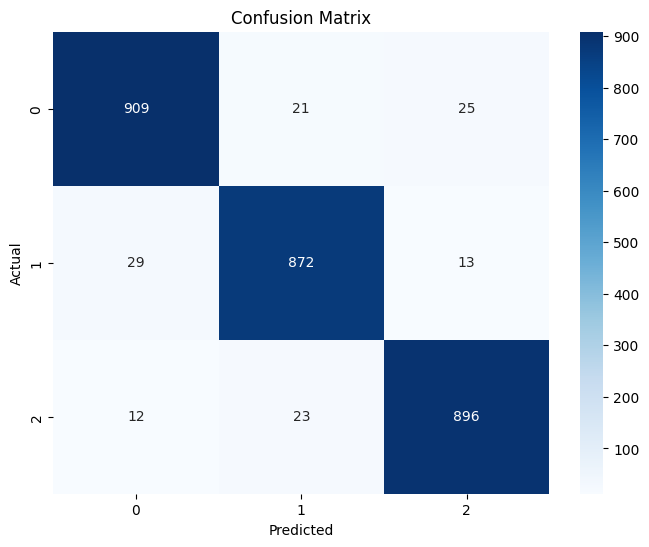

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Feature Importance**

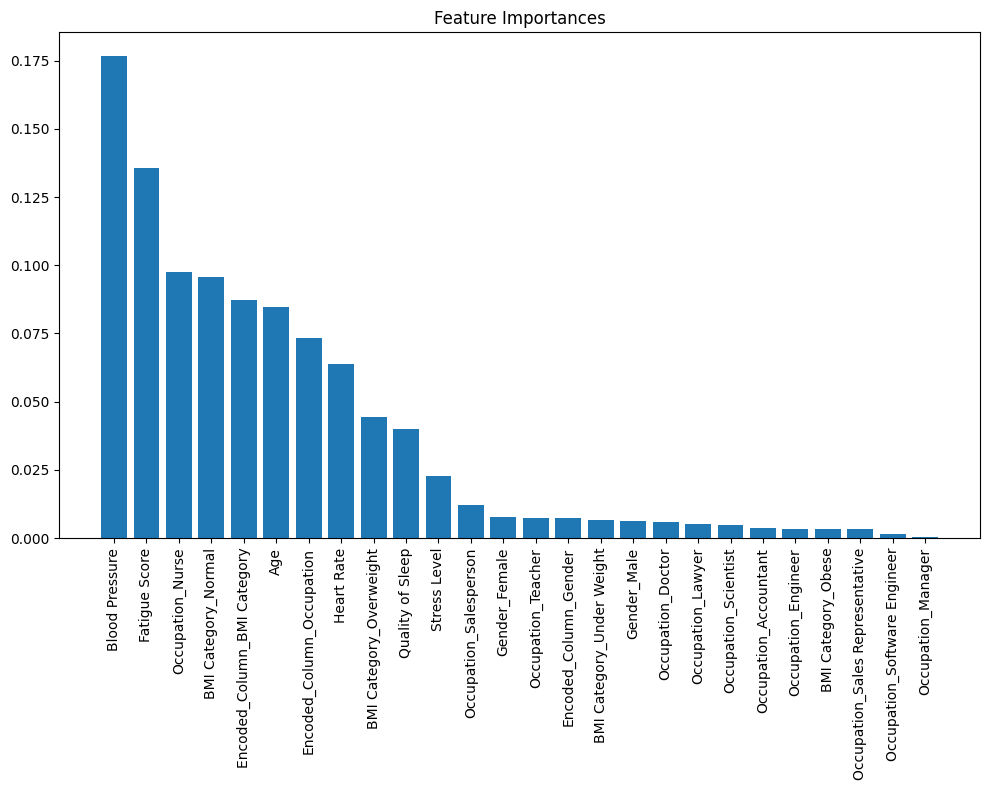

In [41]:
importances = stacking_model.named_estimators_['rf'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

**6. User Interface**

In [42]:
#Saving the created model
import joblib
joblib.dump(stacking_model, 'sleep_data_model.pkl')

['sleep_data_model.pkl']

In [43]:
from google.colab import files
files.download('sleep_data_model.pkl') #Download to local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
#Installing dependencies
!pip install streamlit
!pip install pyngrok

In [45]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import StackingClassifier
import joblib

# Load dataset and model
data = pd.read_csv('Sleep_Data_Sampled.csv')
model = joblib.load("sleep_data_model.pkl")

# Streamlit app title
st.title("Sleep Data Classifier")

# Sidebar for user input
st.sidebar.header('User Input Features')

# Function to accept user input features for prediction
def user_input_features():
    # Dropdowns for categorical variables
    gender = st.sidebar.selectbox('Gender', ('Male', 'Female'))
    occupation = st.sidebar.selectbox('Occupation', data['Occupation'].unique())
    bmi_category = st.sidebar.selectbox('BMI Category', data['BMI Category'].unique())

    # Sliders for numeric variables
    age = st.sidebar.slider('Age', int(data['Age'].min()), int(data['Age'].max()), 30)
    q_sleep = st.sidebar.slider('Quality of Sleep', float(data['Quality of Sleep'].min()), float(data['Quality of Sleep'].max()), 10.0)
    s_level = st.sidebar.slider('Stress Level', float(data['Stress Level'].min()), float(data['Stress Level'].max()), 10.0)
    blood_pressure = st.sidebar.slider('Blood Pressure', float(data['Blood Pressure'].min()), float(data['Blood Pressure'].max()), 10.0)
    heart_rate = st.sidebar.slider('Heart Rate', float(data['Heart Rate'].min()), float(data['Heart Rate'].max()), 70)
    fatigue_score = st.sidebar.slider('Fatigue Score', float(data['Fatigue Score'].min()), float(data['Fatigue Score'].max()), 7.0)

    # Create DataFrame from user inputs
    features = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Occupation': [occupation],
        'Quality of Sleep': [q_sleep],
        'Stress Level': [s_level],
        'BMI Category': [bmi_category],
        'Blood Pressure': [blood_pressure],
        'Heart Rate': [heart_rate],
        'Fatigue Score': [fatigue_score]
    })

    return features

# Get user input
input_df = user_input_features()

# Display input features
st.subheader('User Input Features')
st.write(input_df)

# Encode categorical columns just like in the training phase
# Recreate LabelEncoder for 'Gender', 'Occupation', and 'BMI Category'
gender_encoder = LabelEncoder().fit(data['Gender'])
occupation_encoder = LabelEncoder().fit(data['Occupation'])
bmi_encoder = LabelEncoder().fit(data['BMI Category'])

# Apply encoding to the input data
input_df['Gender'] = gender_encoder.transform(input_df['Gender'])
input_df['Occupation'] = occupation_encoder.transform(input_df['Occupation'])
input_df['BMI Category'] = bmi_encoder.transform(input_df['BMI Category'])

# Recreate MinMaxScaler for numeric columns
scaler = MinMaxScaler(feature_range=(0, 10)).fit(data[['Quality of Sleep', 'Stress Level', 'Blood Pressure', 'Heart Rate', 'Fatigue Score']])

# Scale numeric features
numeric_columns = ['Quality of Sleep', 'Stress Level', 'Blood Pressure', 'Heart Rate', 'Fatigue Score']
input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])

# Predict using the trained model
prediction = model.predict(input_df)

# Display prediction result
st.subheader('Prediction')
prediction_label = 'Yes' if prediction[0] == 1 else 'No'
st.write(f"Predicted Sleep Disorder: {prediction_label}")


Overwriting app.py


In [46]:
#ngrok auth-token for impx3
!ngrok config add-authtoken 2mbP5iUf3y2gkyROZfGLTM6nDGS_3PyYLEZNaADmoEbuHmjH

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [47]:
#Installing dependencies
!pip install streamlit
!pip install pyngrok

#Importing ngrok and run the app
from pyngrok import ngrok

#Run the Streamlit app in the background
!streamlit run app.py &>/dev/null&

#Expose the app using ngrok
public_url = ngrok.connect(8501)
print(f'App is live at: {public_url}')

App is live at: NgrokTunnel: "https://36f5-34-125-84-86.ngrok-free.app" -> "http://localhost:8501"


Click on the link, and it will open your Streamlit app in the browser.